## KNN(K-Nearest Neighbour) Classification Algorithm
1. Select the K value.

2. Calculate the Euclidean distance from the K value to Data points.

3. Take the K nearest neighbours as per the calculated Euclidean distance.

4. Among these k neighbours, count the number of the data points in each category.

5. Classify the new data points to that category for which the number of neighbour is maximum.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("Dataset.csv")
df.head(5)

,id,name,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
0,1,Chardonnay,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Port,Balanced,5
1,2,Cabernet Sauvignon,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,White,Sour,5
2,3,Merlot,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,Rose,Earthy,5
3,4,Pinot Noir,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,White,Bitter,6
4,5,Zinfandel,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Rose,Balanced,5


In [7]:
df.dtypes

id                        int64
name                     object
fixed acidity           float64
citric acid             float64
residual sugar          float64
chlorides               float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
Taste                    object
quality                   int64
dtype: object

## Removing Irrelevant Columns

### Removing columns like "id" and "name" as they are not relevent to our analysis.

In [8]:
df=df.drop(['id','name'],axis=1)
df.head(5)

,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
0,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Port,Balanced,5
1,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,White,Sour,5
2,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,Rose,Earthy,5
3,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,White,Bitter,6
4,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Rose,Balanced,5


## Checking for any duplicate rows in the dataset and discarding them if any.

In [9]:
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (1, 11)


In [10]:
df.drop_duplicates(inplace=True)
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (0, 11)


## Checking for Null values in Dataset and Removing it


In [11]:
print(df.isnull().sum())

fixed acidity           1
citric acid             2
residual sugar          0
chlorides               1
total sulfur dioxide    4
density                 3
sulphates               0
alcohol                 0
type                    3
Taste                   5
quality                 0
dtype: int64


In [12]:
df = df.dropna()
print(df.isnull().sum())

fixed acidity           0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
Taste                   0
quality                 0
dtype: int64


#### Renaming Target Column

In [13]:
df = df.rename(columns = {"quality" : "Target"})
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,Target
0,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Port,Balanced,5
1,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,White,Sour,5
2,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,Rose,Earthy,5
3,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,White,Bitter,6
4,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Rose,Balanced,5


In [14]:
import warnings
warnings.filterwarnings("ignore")

typeC={"Port":0,"White":1,"Rose":2,"Red":3}
taste={"Balanced":0,"Sour":1,"Earthy":2,"Bitter":3,"Sweet":4}

df["type"]=df["type"].replace(typeC)
df["Taste"]=df["Taste"].replace(taste)
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,Target
0,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,0,0,5
1,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,1,1,5
2,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,2,2,5
3,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,1,3,6
4,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,2,0,5


## EDA

### Countplot

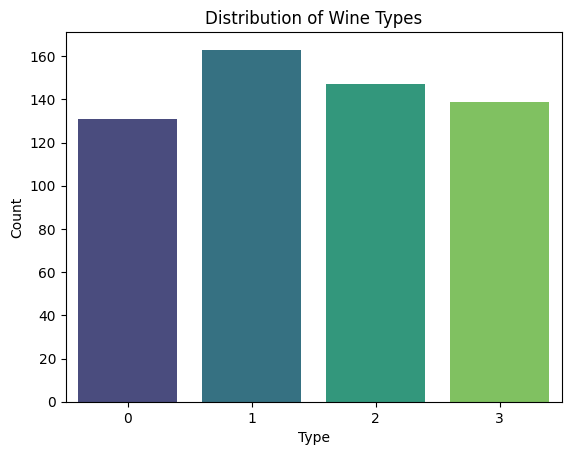

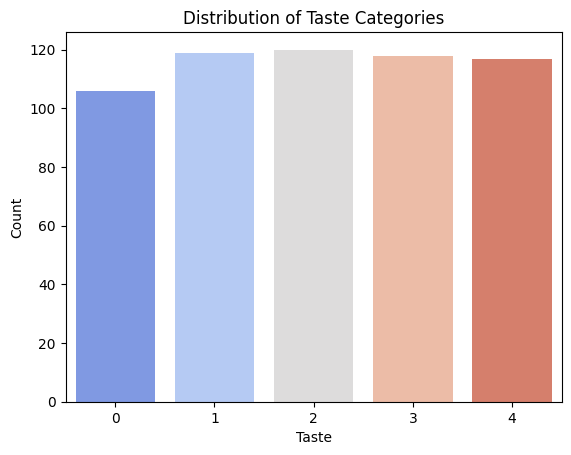

In [15]:
import warnings
warnings.filterwarnings('ignore')


# Plotting the distribution of the 'type' variable
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Wine Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

print()
# Plotting the distribution of the 'Taste' variable
sns.countplot(data=df, x='Taste', palette='coolwarm')
plt.title('Distribution of Taste Categories')
plt.xlabel('Taste')
plt.ylabel('Count')
plt.show()

### Heatmap

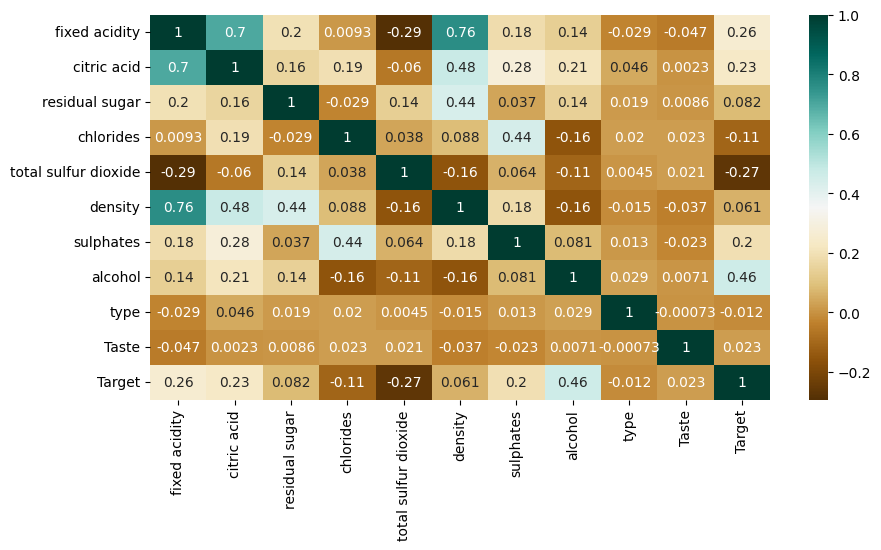

In [16]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

### Scatterplot

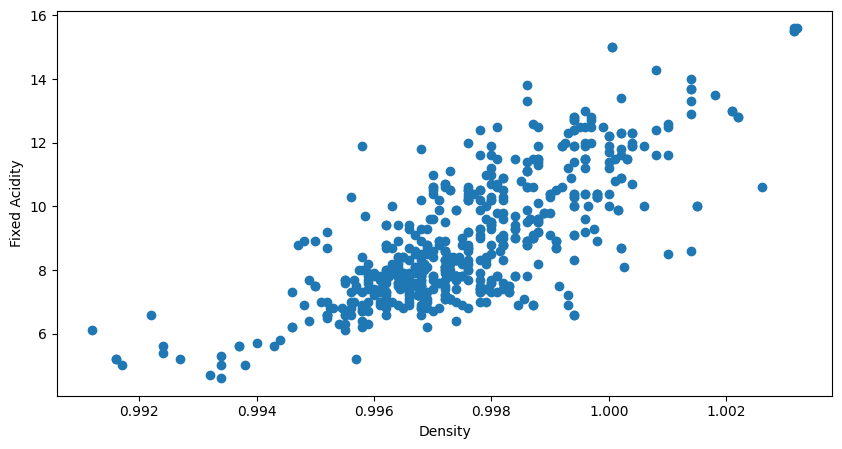

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['density'], df['fixed acidity'])
ax.set_xlabel('Density')
ax.set_ylabel('Fixed Acidity')
plt.show()

### Pairplot

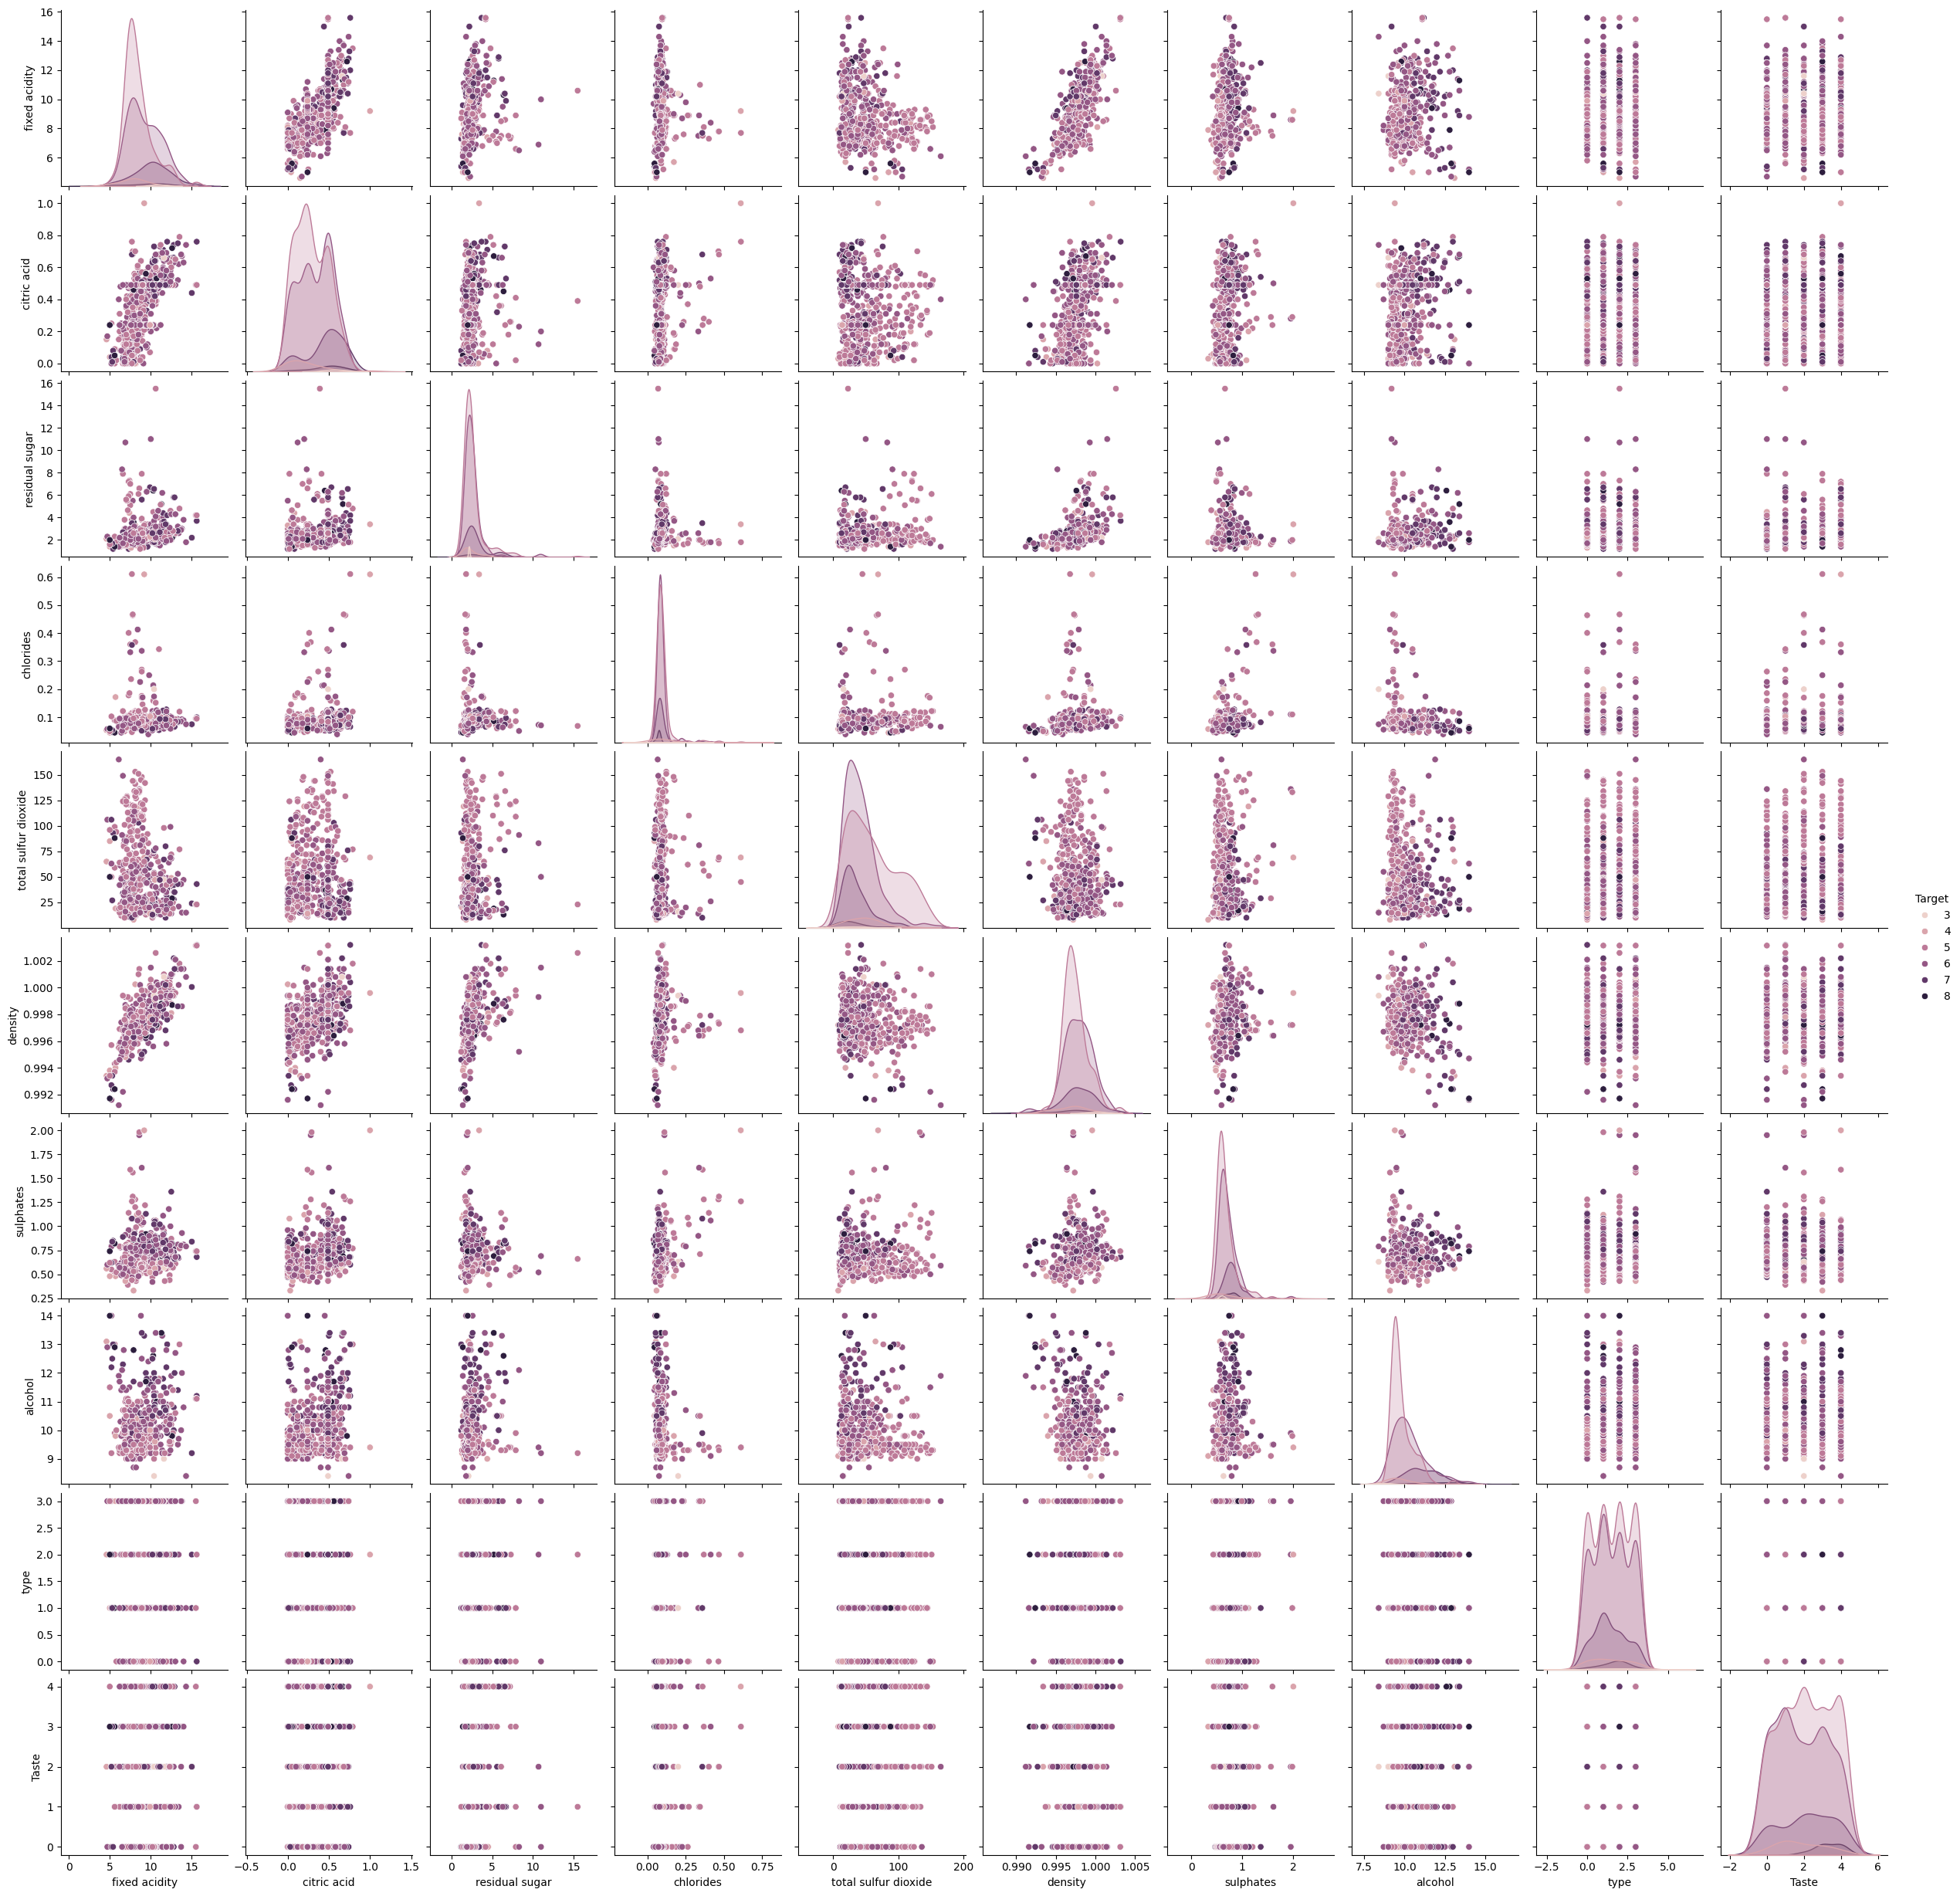

In [19]:
sns.pairplot(data=df,hue='Target')
plt.show()

## Spliting the dataset into Dependent and Independent Variables

In [30]:
x = df.drop('Target', axis=1)
y = df["Target"]

## Split the value to train and test

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.20, random_state=38, stratify = y)

## Error Rate Plot

Text(0, 0.5, 'Error Rate')

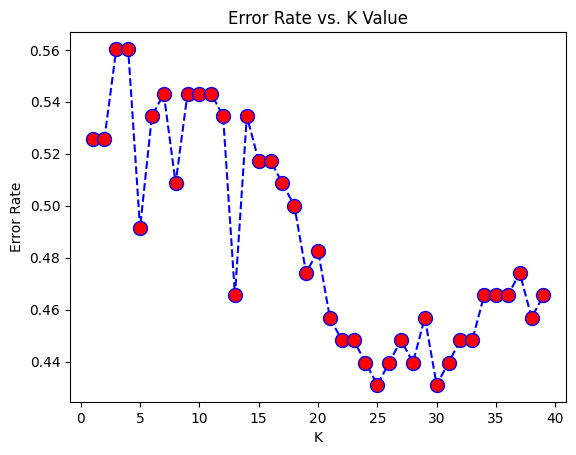

In [32]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### As the error eate is the lowest when k=25 or when k=30 we will create a model with the same values.

#### Here we perform KNN with k=30

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=30)

In [57]:
#Prediction of test set
prediction_knn = knn.predict(X_test)
#Print the predicted values
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [5 6 6 6 6 5 5 5 5 6 6 5 6 6 5 6 6 6 6 6 6 5 5 6 6 5 6 5 5 5 5 6 5 5 6 5 6
 5 5 5 5 5 6 6 5 6 6 6 6 6 6 5 6 6 6 6 5 5 5 6 5 6 5 6 5 6 5 6 7 6 6 5 6 6
 6 5 5 6 6 6 5 5 6 5 5 5 6 6 6 5 5 6 6 6 6 6 5 5 5 5 6 5 5 5 5 6 5 5 6 5 6
 5 5 6 6 5]


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.66      0.74      0.70        53
           6       0.49      0.61      0.55        44
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         2

    accuracy                           0.57       116
   macro avg       0.23      0.27      0.25       116
weighted avg       0.49      0.57      0.53       116

Accuracy:  0.5689655172413793


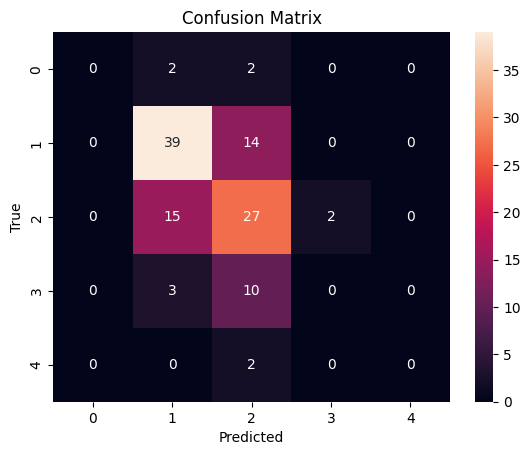

In [67]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_test, prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y_test, prediction_knn))
print("Accuracy: ",knn.score(X_test,Y_test))

### Here we perform KNN where k=25

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=25)

In [63]:
#Prediction of test set
prediction_knn = knn.predict(X_test)
#Print the predicted values
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [5 6 6 6 5 5 5 5 5 6 6 5 6 6 5 6 7 6 6 6 6 5 5 6 6 5 5 5 5 5 5 6 5 5 6 5 6
 5 5 5 6 5 6 6 5 6 6 6 6 5 6 5 5 5 6 6 5 5 5 6 5 6 5 6 5 6 5 6 7 6 6 5 5 6
 6 5 5 6 6 6 6 5 6 5 5 5 6 6 6 5 5 6 6 6 6 6 5 5 5 5 6 5 5 5 5 6 5 5 6 5 6
 5 5 6 6 5]


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.66      0.74      0.70        53
           6       0.49      0.61      0.55        44
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         2

    accuracy                           0.57       116
   macro avg       0.23      0.27      0.25       116
weighted avg       0.49      0.57      0.53       116

Accuracy:  0.5689655172413793


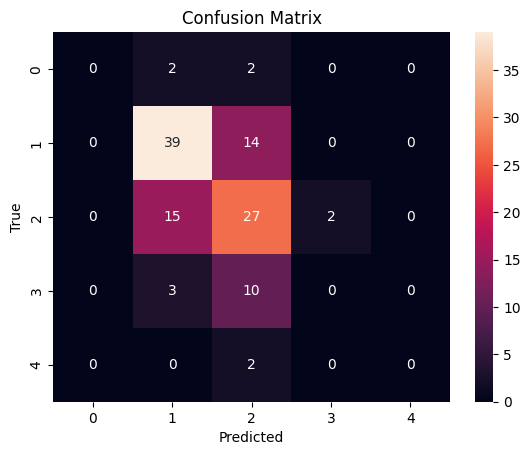

In [66]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_test, prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y_test, prediction_knn))
print("Accuracy: ",knn.score(X_test,Y_test))

# --------------------------------------------